In [11]:
##Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
from pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)
import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

In [7]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 2.7.11 |Anaconda 4.0.0 (64-bit)| (default, Feb 16 2016, 09:58:36) [MSC v.1500 64 bit (AMD64)]
Pandas version 0.18.0
Matplotlib version 1.5.1


In [8]:
##CREATE DATA
# The inital set of baby names and bith rates
names= ['Bob','Jessica','Mary','John','Mel']
births= [968, 155, 77, 578, 973]
print "Initial set created..."

Initial set created...


In [9]:
#Understanding zip function 
#works like a help function. Following command will display information regarding zip function (e.g. syntax and return type).
zip?

In [10]:
#Merge two lists[names,births] using zip function
BabyDataSet=zip(names,births)
#Display Dataset
print BabyDataSet

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973)]


In [12]:
#We are basically done creating the data set. We now will use the pandas library to export this data set into a csv file.
#df will be a DataFrame object.
#You can think of this object holding the contents of the BabyDataSet in a format similar to a sql table or an excel spreadsheet.
#list->Dataframe conversion
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
print df  #print dataframe object

     Names  Births
0      Bob     968
1  Jessica     155
2     Mary      77
3     John     578
4      Mel     973


In [13]:
#Understand to_csv function.Following command will display information regarding to_csv function.
df.to_csv?

In [23]:
#Export the dataframe to a csv file. We can name the file births1880.csv.The function to_csv will be used to export the file. 
#The file will be saved in the same location of the working directory unless specified otherwise.
#The only parameters we will use is index and header. 
#Setting these parameters to True will prevent the index and header names from being exported.
#Change the values of these parameters to get a better understanding of their use.
df.to_csv('births1880.csv',index=False,header=False)

In [17]:
#Even though this functions has many parameters, we will simply pass it the location of the text file.
Location = r'C:\Users\AlgoAnalytics1\Desktop\Learning Python Data Analysis\births1880.csv'
#Notice the r before the string. Since the slashes are special characters, prefixing the string with a r will escape the whole string.
df = pd.read_csv(Location)
print df

       Bob  968
0  Jessica  155
1     Mary   77
2     John  578
3      Mel  973


In [18]:
#This brings us the our first problem of the exercise.
#The read_csv function treated the first record in the csv file as the header names. 
#This is obviously not correct since the text file did not provide us with header names.
#To correct this we will pass the header parameter to the read_csv function and set it to None (means null in python).
df = pd.read_csv(Location,header=None)
print df

         0    1
0      Bob  968
1  Jessica  155
2     Mary   77
3     John  578
4      Mel  973


In [20]:
#If we wanted to give the columns specific names, we would have to pass another paramter called names.
#We can also omit the header parameter.
df = pd.read_csv(Location,names=['Names','Births'])


In [21]:
#Observe printed DataFrame:You can think of the numbers [0,1,2,3,4] as the row numbers in an Excel file.
#In pandas these are part of the index of the dataframe.
#You can think of the index as the primary key of a sql table with the exception that an index is allowed to have duplicates.
#[Names, Births] can be though of as column headers similar to the ones found in an Excel spreadsheet or sql database.
print df

     Names  Births
0      Bob     968
1  Jessica     155
2     Mary      77
3     John     578
4      Mel     973


In [22]:
#Delete the csv file now that we are done using it.
import os
os.remove(Location)

In [27]:
##PREPARE DATA
#The data we have consists of baby names and the number of births in the year 1880. 
#We already know that we have 5 records and none of the records are missing (non-null values).
#The Names column at this point is of no concern since it most likely is just composed of alpha numeric strings (baby names).
#There is a chance of bad data in this column but we will not worry about that at this point of the analysis.
#The Births column should just contain integers representing the number of babies born in a specific year with a specific name.
#Check if the all the data is of the data type integer. It would not make sense to have this column have a data type of float. 
#I would not worry about any possible outliers at this point of the analysis.

# Check data type of the columns
df.dtypes
# Check data type of Births column
df.Births.dtype
#Births column is of type int64, thus no floats (decimal no.)/alpha numeric characters will be present in this column.


dtype('int64')

In [31]:
##ANALYSE DATA
#To find the most popular name or the baby name with the higest birth rate, we can do one of the following.
#Method 1: Sort the dataframe and select the top row 
#Method 2: Use the max() attribute to find the maximum value

In [29]:
# Method 1:
Sorted = df.sort_values(['Births'], ascending=False)
Sorted.head(1)

,Names,Births
4,Mel,973


In [32]:
# Method 2:
df['Births'].max()

973

The most popular name


,Names,Births
4,Mel,973


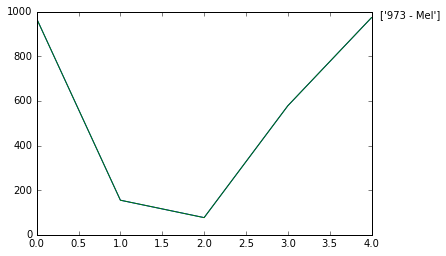

In [33]:
##PRESENT DATA
# Create graph
df['Births'].plot()
plt.plot(df['Births'])

# Maximum value in the data set
MaxValue = df['Births'].max()

# Name associated with the maximum value
MaxName = df['Names'][df['Births'] == df['Births'].max()].values

# Text to display on graph
Text = str(MaxValue) + " - " + MaxName

# Add text to graph
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

print("The most popular name")
df[df['Births'] == df['Births'].max()]
#Sorted.head(1) can also be used